# Project 3


Your project should be submitted (as a Jupyter Notebook via GitHub) by end of the due date. The group should present their code and findings in our meetup. The ability to be an effective member of a virtual team is highly valued in the data science job market.

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can.

Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set.

How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect? Source: Natural Language Processing with Python, exercise 6.10.2.


In [ ]:
import nltk
from nltk.corpus import names

import random

# Load Corpus

There are two files in the corpus:


1.   'female.txt': It contains 5001 females names.
2.   'male.txt': It contains 2943 male names.



In [ ]:
nltk.download('names')
names.fileids()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


['female.txt', 'male.txt']

## Male Names

In [ ]:
# From text p 62
names = nltk.corpus.names

male_names = names.words('male.txt')
print(male_names)
len(male_names)

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim', 'Abdullah', 'Abe', 'Abel', 'Abelard', 'Abner', 'Abraham', 'Abram', 'Ace', 'Adair', 'Adam', 'Adams', 'Addie', 'Adger', 'Aditya', 'Adlai', 'Adnan', 'Adolf', 'Adolfo', 'Adolph', 'Adolphe', 'Adolpho', 'Adolphus', 'Adrian', 'Adrick', 'Adrien', 'Agamemnon', 'Aguinaldo', 'Aguste', 'Agustin', 'Aharon', 'Ahmad', 'Ahmed', 'Ahmet', 'Ajai', 'Ajay', 'Al', 'Alaa', 'Alain', 'Alan', 'Alasdair', 'Alastair', 'Albatros', 'Albert', 'Alberto', 'Albrecht', 'Alden', 'Aldis', 'Aldo', 'Aldric', 'Aldrich', 'Aldus', 'Aldwin', 'Alec', 'Aleck', 'Alejandro', 'Aleks', 'Aleksandrs', 'Alessandro', 'Alex', 'Alexander', 'Alexei', 'Alexis', 'Alf', 'Alfie', 'Alfonse', 'Alfonso', 'Alfonzo', 'Alford', 'Alfred', 'Alfredo', 'Algernon', 'Ali', 'Alic', 'Alister', 'Alix', 'Allah', 'Allan', 'Allen', 'Alley', 'Allie', 'Allin', 'Allyn', 'Alonso', 'Alonzo', 'Aloysius', 'Alphonse', 'Alphonso', 'Alston', 'Alton', 'Alvin', 'Alwin', 'Amadeus'

2943

## Female Names

In [ ]:
female_names = names.words('female.txt')
print(female_names)
len(female_names)

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale', 'Abra', 'Acacia', 'Ada', 'Adah', 'Adaline', 'Adara', 'Addie', 'Addis', 'Adel', 'Adela', 'Adelaide', 'Adele', 'Adelice', 'Adelina', 'Adelind', 'Adeline', 'Adella', 'Adelle', 'Adena', 'Adey', 'Adi', 'Adiana', 'Adina', 'Adora', 'Adore', 'Adoree', 'Adorne', 'Adrea', 'Adria', 'Adriaens', 'Adrian', 'Adriana', 'Adriane', 'Adrianna', 'Adrianne', 'Adrien', 'Adriena', 'Adrienne', 'Aeriel', 'Aeriela', 'Aeriell', 'Ag', 'Agace', 'Agata', 'Agatha', 'Agathe', 'Aggi', 'Aggie', 'Aggy', 'Agna', 'Agnella', 'Agnes', 'Agnese', 'Agnesse', 'Agneta', 'Agnola', 'Agretha', 'Aida', 'Aidan', 'Aigneis', 'Aila', 'Aile', 'Ailee', 'Aileen', 'Ailene', 'Ailey', 'Aili', 'Ailina', 'Ailyn', 'Aime', 'Aimee', 'Aimil', 'Aina', 'Aindrea', 'Ainslee', 'Ainsley', 'Ainslie', 'Ajay', 'Alaine', 'Alameda', 'Alana', 'Alanah', 'Alane', 'Alanna', 'Alayne', 'Alberta', 'Albertina', 'Albertine', 'Albina', 'Alecia', 'Aleda', 'Aleece', 'Aleecia

5001

## Gender Neutral Names

Just observing the first couple names of each list, we can see some names appear in both genders. There are 365 gender neutral names.

In [ ]:
neutral_names = [w for w in male_names if w in female_names]
print(neutral_names)
len(neutral_names)

['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', 'Barrie', 'Barry', 'Beau', 'Bennie', 'Benny', 'Bernie', 'Bert', 'Bertie', 'Bill', 'Billie', 'Billy', 'Blair', 'Blake', 'Bo', 'Bobbie', 'Bobby', 'Brandy', 'Brett', 'Britt', 'Brook', 'Brooke', 'Brooks', 'Bryn', 'Cal', 'Cam', 'Cammy', 'Carey', 'Carlie', 'Carlin', 'Carmine', 'Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil', 'Chad', 'Chris', 'Chrissy', 'Christian', 'Christie', 'Christy', 'Clair', 'Claire', 'Clare', 'Claude', 'Clem', 'Clemmie', 'Cody', 'Connie', 'Constantine', 'Corey', 'Corrie', 'Cory', 'Courtney', 'Cris', 'Daffy', 'Dale', 'Dallas', 'Dana', 'Dani', 'Daniel', 'Dannie', 'Danny', 'Darby', 'Darcy', 'Darryl', 'Daryl', 'Deane', 'Del', 'Dell', 'Demetris', 'Dennie', 'Denny', 'Devin', 'Devon', 'Dion', 'Dionis', 'Dominique', 'Donnie', 'Donny', 'Do

365

## Characteristics of Gender Names

## Last Letter of Name

Names ending with 'a','e', or 'i' are mostly female names.

Names ending with 'h', or 'l' are gender neutral (equally likely).

Names ending with 'k', 'o', 'r', 's', or 't' are mostly male names.

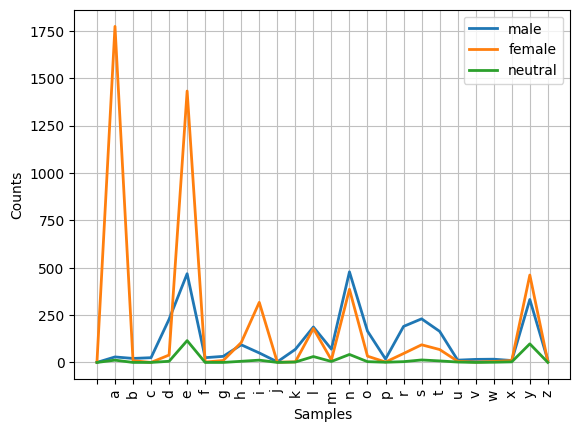

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (category, name[-1])
    for category in ['male','female','neutral']
    for name in (male_names if category == 'male' else (female_names if category == 'female' else neutral_names))
)

cfd.plot()

# Data Preprocessing


In [ ]:
# Adding gender labels to each name
labeled_names = ([(name, 'male') for name in male_names] +
                 [(name, 'female') for name in female_names])

# Shuffle the labeled names to mix male and female names
random.seed(105)
random.shuffle(labeled_names)

# Print the first 10 labeled names as a sample
print("Labeled Names:", labeled_names[:10])

Labeled Names: [('Thorstein', 'male'), ('Rebeka', 'female'), ('Tabor', 'male'), ('Monika', 'female'), ('Leorah', 'female'), ('Cori', 'female'), ('Jo-Anne', 'female'), ('Mitzi', 'female'), ('Dulcine', 'female'), ('Zola', 'female')]


# Gender Feature

## Model 1

Our first model looks at the last letter of each name. It has an accuracy rate of 76.8%.

In [ ]:
def gender_features(word):
  return {'last_letter':word[-1]}

In [ ]:
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

train_set = [(gender_features(n), g) for (n,g) in train_names]
devtest_set = [(gender_features(n), g) for (n,g) in devtest_names]
test_set = [(gender_features(n), g) for (n,g) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.768


Below shows the top 10 most important features in our classifier.

In [ ]:
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'a'            female : male   =     35.9 : 1.0
             last_letter = 'k'              male : female =     27.7 : 1.0
             last_letter = 'p'              male : female =     16.3 : 1.0
             last_letter = 'f'              male : female =     13.8 : 1.0
             last_letter = 'd'              male : female =      8.8 : 1.0
             last_letter = 'm'              male : female =      8.8 : 1.0
             last_letter = 'v'              male : female =      8.4 : 1.0
             last_letter = 'o'              male : female =      8.3 : 1.0
             last_letter = 'g'              male : female =      7.7 : 1.0
             last_letter = 'b'              male : female =      6.6 : 1.0


In [ ]:
errors = []
for (name, tag) in devtest_names:
  guess = classifier.classify(gender_features(name))
  if guess != tag:
    errors.append( (tag, guess, name) )

In [ ]:
for (tag, guess, name) in sorted(errors):
  print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Ag                            
correct=female   guess=male     name=Alison                        
correct=female   guess=male     name=Anais                         
correct=female   guess=male     name=Arlyn                         
correct=female   guess=male     name=Avis                          
correct=female   guess=male     name=Beatrix                       
correct=female   guess=male     name=Beatriz                       
correct=female   guess=male     name=Brandais                      
correct=female   guess=male     name=Bryn                          
correct=female   guess=male     name=Caitlin                       
correct=female   guess=male     name=Caitrin                       
correct=female   guess=male     name=Carlen                        
correct=female   guess=male     name=Celestyn                      
correct=female   guess=male     name=Cherilyn                      
correct=female   guess=male     name=Christan   

## Model 2

In [ ]:
def gender_features(word):
  return {'suffix1':word[-1:],
          'suffix2':word[-2:]}

In [ ]:
random.seed(106)
random.shuffle(labeled_names)

train_names2 = labeled_names[1500:]
devtest_names2 = labeled_names[500:1500]
test_names2 = labeled_names[:500]

train_set2 = [(gender_features(n), g) for (n,g) in train_names2]
devtest_set2 = [(gender_features(n), g) for (n,g) in devtest_names2]
classifier = nltk.NaiveBayesClassifier.train(train_set2)
print(nltk.classify.accuracy(classifier, devtest_set2))

0.79


In [ ]:
classifier.show_most_informative_features(10)

Most Informative Features
                 suffix2 = 'na'           female : male   =    142.4 : 1.0
                 suffix2 = 'ia'           female : male   =     82.0 : 1.0
                 suffix2 = 'la'           female : male   =     61.9 : 1.0
                 suffix2 = 'ta'           female : male   =     40.7 : 1.0
                 suffix1 = 'a'            female : male   =     35.9 : 1.0
                 suffix2 = 'us'             male : female =     34.7 : 1.0
                 suffix2 = 'ld'             male : female =     30.3 : 1.0
                 suffix1 = 'k'              male : female =     27.7 : 1.0
                 suffix2 = 'rd'             male : female =     27.7 : 1.0
                 suffix2 = 'do'             male : female =     22.6 : 1.0


In [ ]:
errors = []
for (name, tag) in devtest_names:
  guess = classifier.classify(gender_features(name))
  if guess != tag:
    errors.append( (tag, guess, name) )
for (tag, guess, name) in sorted(errors):
  print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Abigael                       
correct=female   guess=male     name=Aeriell                       
correct=female   guess=male     name=Ag                            
correct=female   guess=male     name=Alison                        
correct=female   guess=male     name=Amabel                        
correct=female   guess=male     name=Anais                         
correct=female   guess=male     name=Annabal                       
correct=female   guess=male     name=Averil                        
correct=female   guess=male     name=Avis                          
correct=female   guess=male     name=Beatriz                       
correct=female   guess=male     name=Blake                         
correct=female   guess=male     name=Brandais                      
correct=female   guess=male     name=Caitlin                       
correct=female   guess=male     name=Caitrin                       
correct=female   guess=male     name=Carlen     

## Model 3

In [ ]:
def gender_features(word):
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'prefix1':word[:1],
          'prefix2':word[:2],}

In [ ]:
random.seed(107)
random.shuffle(labeled_names)

train_names3 = labeled_names[1500:]
devtest_names3 = labeled_names[500:1500]
test_names3 = labeled_names[:500]

train_set3 = [(gender_features(n), g) for (n,g) in train_names3]
devtest_set3 = [(gender_features(n), g) for (n,g) in devtest_names3]
classifier = nltk.NaiveBayesClassifier.train(train_set3)
print(nltk.classify.accuracy(classifier, devtest_set3))

0.814


## Model 4

In [ ]:
def gender_features(word):
  length = len(word)
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix1':word[:1],
          'prefix2':word[:2],}

In [ ]:
random.seed(108)
random.shuffle(labeled_names)

train_names4 = labeled_names[1500:]
devtest_names4 = labeled_names[500:1500]
test_names4 = labeled_names[:500]

train_set4 = [(gender_features(n), g) for (n,g) in train_names4]
devtest_set4 = [(gender_features(n), g) for (n,g) in devtest_names4]
classifier = nltk.NaiveBayesClassifier.train(train_set4)
print(nltk.classify.accuracy(classifier, devtest_set4))

0.811


## Model 5

In [ ]:
def gender_features(word):
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix1':word[:1],
          'prefix2':word[:2],
          'prefix3':word[:3]}

In [ ]:
train_set5 = [(gender_features(n), g) for (n,g) in train_names]
devtest_set5 = [(gender_features(n), g) for (n,g) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set5)
print(nltk.classify.accuracy(classifier, devtest_set5))

0.856


In [ ]:
errors = []
for (name, tag) in devtest_names:
  guess = classifier.classify(gender_features(name))
  if guess != tag:
    errors.append( (tag, guess, name) )
for (tag, guess, name) in sorted(errors):
  print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Abigael                       
correct=female   guess=male     name=Ag                            
correct=female   guess=male     name=Alison                        
correct=female   guess=male     name=Averil                        
correct=female   guess=male     name=Avis                          
correct=female   guess=male     name=Beatriz                       
correct=female   guess=male     name=Blake                         
correct=female   guess=male     name=Brandais                      
correct=female   guess=male     name=Caitlin                       
correct=female   guess=male     name=Caitrin                       
correct=female   guess=male     name=Charil                        
correct=female   guess=male     name=Christan                      
correct=female   guess=male     name=Clair                         
correct=female   guess=male     name=Clem                          
correct=female   guess=male     name=Con        

In [ ]:
def gender_features(word):
  length = len(word)
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix1':word[:1],
          'prefix2':word[:2],
          'prefix3':word[:3],
          'length':length}

In [ ]:
train_set6 = [(gender_features(n), g) for (n,g) in train_names]
devtest_set6 = [(gender_features(n), g) for (n,g) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set6)
print(nltk.classify.accuracy(classifier, devtest_set6))

0.854
